# The Intern Group - Exploratory Data Analysis on Twitter Data

In [1]:
from collections import Counter
from tweet_parser.tweet import Tweet
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, ngrams

from wordcloud import WordCloud

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Set default Seaborn style
sns.set()

In [3]:
from utils import load_datasets

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
datasets = load_datasets()

### About datasets

In [6]:
for company in datasets:
    print("%s's Twitter account has %d tweets" % (company, len(datasets[company])))

GoAbroad's Twitter account has 3249 tweets
@naceorg's Twitter account has 3215 tweets
theinterngroup's Twitter account has 3226 tweets


#### What is a Tweet?

```json
{
   'created_at':'Mon Nov 12 13:19:10 +0000 2018',
   'id':1061971668459868160,
   'id_str':'1061971668459868160',
   'text':'15 inspiring podcasts for professionals of every stripe \nhttps://t.co/Fzj24CDtwV',
   'truncated':False,
   'entities':{
      'hashtags':[

      ],
      'symbols':[

      ],
      'user_mentions':[

      ],
      'urls':[
         {
            'url':'https://t.co/Fzj24CDtwV',
            'expanded_url':'https://www.forbes.com/sites/forbescoachescouncil/2017/12/28/15-inspiring-podcasts-for-professionals-of-every-stripe/#6cb0b38d20af',
            'display_url':'forbes.com/sites/forbesco…',
            'indices':[
               57,
               80
            ]
         }
      ]
   },
   'source':'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
   'in_reply_to_status_id':None,
   'in_reply_to_status_id_str':None,
   'in_reply_to_user_id':None,
   'in_reply_to_user_id_str':None,
   'in_reply_to_screen_name':None,
   'user':{
      'id':763825382,
      'id_str':'763825382',
      'name':'The Intern Group',
      'screen_name':'TheInternGroup',
      'location':'USA-CAN-EUR-ASIA-AUS-LATAM',
      'description':'The Intern Group is an award-winning organization that provides first class internship programs worldwide! Apply now for a life-changing experience.',
      'url':'http://t.co/FbbeU4o4hC',
      'entities':{
         'url':{
            'urls':[
               {
                  'url':'http://t.co/FbbeU4o4hC',
                  'expanded_url':'http://bit.ly/1hzVW6S',
                  'display_url':'bit.ly/1hzVW6S',
                  'indices':[
                     0,
                     22
                  ]
               }
            ]
         },
         'description':{
            'urls':[

            ]
         }
      },
      'protected':False,
      'followers_count':3931,
      'friends_count':2267,
      'listed_count':97,
      'created_at':'Fri Aug 17 14:34:02 +0000 2012',
      'favourites_count':809,
      'utc_offset':None,
      'time_zone':None,
      'geo_enabled':False,
      'verified':False,
      'statuses_count':4350,
      'lang':'en',
      'contributors_enabled':False,
      'is_translator':False,
      'is_translation_enabled':False,
      'profile_background_color':'C0DEED',
      'profile_background_image_url':'http://abs.twimg.com/images/themes/theme1/bg.png',
      'profile_background_image_url_https':'https://abs.twimg.com/images/themes/theme1/bg.png',
      'profile_background_tile':False,
      'profile_image_url':'http://pbs.twimg.com/profile_images/719614917607821314/z-4s9JEE_normal.jpg',
      'profile_image_url_https':'https://pbs.twimg.com/profile_images/719614917607821314/z-4s9JEE_normal.jpg',
      'profile_banner_url':'https://pbs.twimg.com/profile_banners/763825382/1458245997',
      'profile_link_color':'3B94D9',
      'profile_sidebar_border_color':'FFFFFF',
      'profile_sidebar_fill_color':'DDEEF6',
      'profile_text_color':'333333',
      'profile_use_background_image':True,
      'has_extended_profile':False,
      'default_profile':False,
      'default_profile_image':False,
      'following':False,
      'follow_request_sent':False,
      'notifications':False,
      'translator_type':'none'
   },
   'geo':None,
   'coordinates':None,
   'place':None,
   'contributors':None,
   'is_quote_status':False,
   'retweet_count':0,
   'favorite_count':0,
   'favorited':False,
   'retweeted':False,
   'possibly_sensitive':False,
   'lang':'en'
}
```

Twitter API Reference: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object

## Hashtags

In [14]:
def most_frequent(company, datasets, k=15):
    """Calculate the top k hashtags.

    This function print a list of top k most frequent hashtags.

    Args:
        arg1 (string): Name of company to process.
        arg2 (dict): Datasets of all companies.
        arg3 (int): List length.
    Examples:
        >>> most_frequent('theinterngroup', datasets, 3)
        theinterngroup:
                Hashtag  count
        0  internabroad    268
        1  careeradvice    176
        2    internship    157
    """
    hashtags = []
    for tweet in datasets[company]:
        tweet = Tweet(tweet)
        try:
            if tweet.hashtags:
                hashtags.extend(tweet.hashtags)
        except IndexError:
            pass
    print("%s:" % company)
    print(pd.DataFrame(Counter(hashtags).most_common(k), columns=['Hashtag', 'count']))

In [15]:
most_frequent('theinterngroup', datasets, 20)

theinterngroup:
                    Hashtag  count
0              internabroad    268
1              careeradvice    176
2                internship    157
3            theinterngroup     97
4                    London     87
5             TravelTuesday     77
6                    Madrid     74
7          internshipabroad     65
8                    travel     63
9                  Colombia     59
10                 Medellin     57
11                 HongKong     54
12              StudyAbroad     49
13  internationalinternship     48
14                Australia     42
15                  funding     38
16                   intern     36
17              internships     34
18                Melbourne     33
19                  NewYork     31


In [16]:
most_frequent('GoAbroad', datasets)

GoAbroad:
             Hashtag  count
0        studyabroad    339
1             travel    208
2       internabroad    136
3    volunteerabroad    107
4             intled    106
5   StudyAbroadGoals     68
6         workabroad     53
7          Volunteer     51
8        Internships     50
9        teachabroad     48
10              TEFL     39
11       StudyAbroad     29
12      volunteering     29
13             Spain     28
14            France     27


In [17]:
most_frequent('@naceorg', datasets)

@naceorg:
            Hashtag  count
0    careerservices    661
1        recruiting    453
2            NACE18    237
3          NACEbite    151
4           interns     96
5        recruiters     71
6   WednesdayWisdom     66
7           NACEMLI     66
8        internship     47
9        Recruiters     41
10      internships     37
11           NACE19     35
12               co     35
13           hiring     30
14        interview     29


## Retweets

In [30]:
def most_retweets(company, datasets, k=5):
    """Calculate the top k retweets.

    This function print a list of top k most frequent retweets.

    Args:
        arg1 (string): Name of company to process.
        arg2 (dict): Datasets of all companies.
        arg3 (int): List length.
    Examples:
        >>> most_retweets('theinterngroup', datasets, 2)
        
        232062: Help me out... https://t.co/maAC4rKMwF
        344: Yes, success is great, but it’s failure that provides great learning — 
             with the right mindset | on @EntMagazineME https://t.co/KxIWstN95Z

    """
    d = Counter()
    for tweet in datasets[company]:
        tweet = Tweet(tweet)
        if 'retweeted_status' in tweet:
            rt = tweet['retweeted_status']
            d[rt['text']] = rt['retweet_count'] 
    for text, count in d.most_common(k):
        print("%d: %s\n" %(count, text))

In [40]:
most_retweets('theinterngroup', datasets)

232062: Help me out... https://t.co/maAC4rKMwF

344: Yes, success is great, but it’s failure that provides great learning — with the right mindset | on @EntMagazineME https://t.co/KxIWstN95Z

196: Why feeling uncomfortable is the key to success: https://t.co/8cwubrUSTk

181: Quote of the day: https://t.co/o7HlrhNWUK https://t.co/pE2LdHYCdr

71: Be your own motivation. #MotivationMonday https://t.co/8CnQp2bBNH



In [37]:
most_retweets('@naceorg', datasets)

1672768: "No one is born hating another person because of the color of his skin or his background or his religion..." https://t.co/InZ58zkoAm

399973: John McCain is an American hero &amp; one of the bravest fighters I've ever known. Cancer doesn't know what it's up against. Give it hell, John.

11532: #BreakingNews: U.S. employers added 209,000 jobs in July, unemployment rate down to 4.3% #JobsReport https://t.co/mWaTLMg1mf

9666: WATCH: Kindergarteners in Tennessee learned how to sign "Happy Birthday" to celebrate the 60th birthday of their be… https://t.co/3w0Foh7sO4

9211: A lady at the library apologized to me today for the "frivolous" reads she was borrowing.
I asked, "Do you enjoy th… https://t.co/f51dfGXIN5



In [38]:
most_retweets('GoAbroad', datasets)

4: I want to study abroad in London...

3: Have a fear of missing out? @GoAbroad has seven travelers share their biggest regrets while traveling, and what you… https://t.co/Qz2sECrsQY

2: Check out what people are saying about our projects on @GoAbroad ✔👍
https://t.co/wE3WN4vkaV

2: Make your #StudyAbroadGoals come true and enter to win a study abroad experience in 2019! https://t.co/htDws1cRAP… https://t.co/b0CXjgIZqi

2: RT @GoAbroad: We are excited to announce that we, https://t.co/5PrlJ1ZqgG—the leading search engine for meaningful… https://t.co/6J8VoHoZZy



## WordClouds

### Cleaning data

In [74]:
def clean_data(dataset):
    corpus = [tweet['text'] for tweet in dataset]

    # Remove urls
    corpus = [re.sub(r"http\S+", "", doc) for doc in corpus]

    # Split into words
    corpus = [word_tokenize(doc) for doc in corpus]

    # Filter out punctuation
    corpus = [[word for word in doc if word.isalpha()] for doc in corpus]

    # Convert to lower case
    corpus = [[word.lower() for word in doc] for doc in corpus]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    corpus = [[word for word in doc if word not in stop_words] for doc in corpus]
    return corpus

In [75]:
def ngram_wordcloud(corpus, n):
    text = ""
    for doc in corpus:
        ngram = list(ngrams(doc, n))
        ngram = ["_".join(t) for t in ngram]
        text += " ".join(ngram) + " "
    wordcloud = WordCloud(max_font_size=50, min_font_size=5, max_words=100).generate(text)
    _ = plt.figure(figsize=(16, 12))
    _ = plt.imshow(wordcloud, interpolation='mitchell')
    _ = plt.axis('off') 

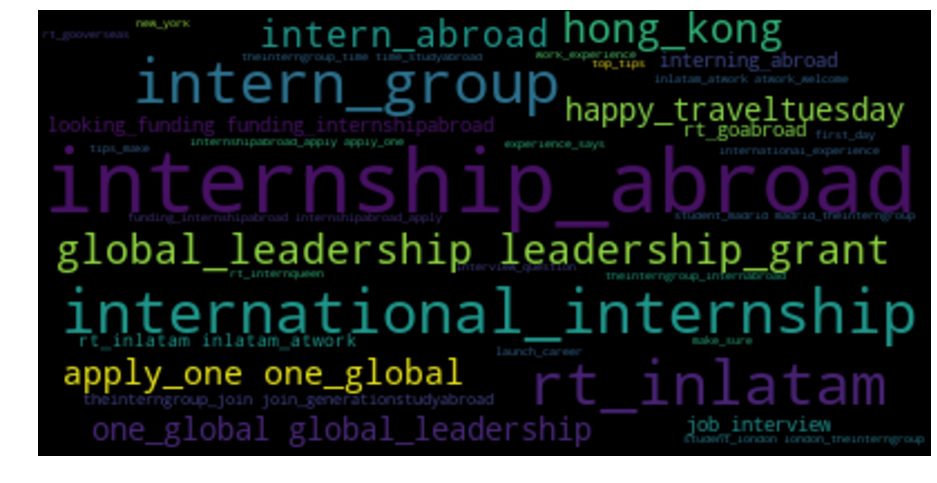

In [76]:
ngram_wordcloud(corpus=clean_data(datasets['theinterngroup']), n=2)

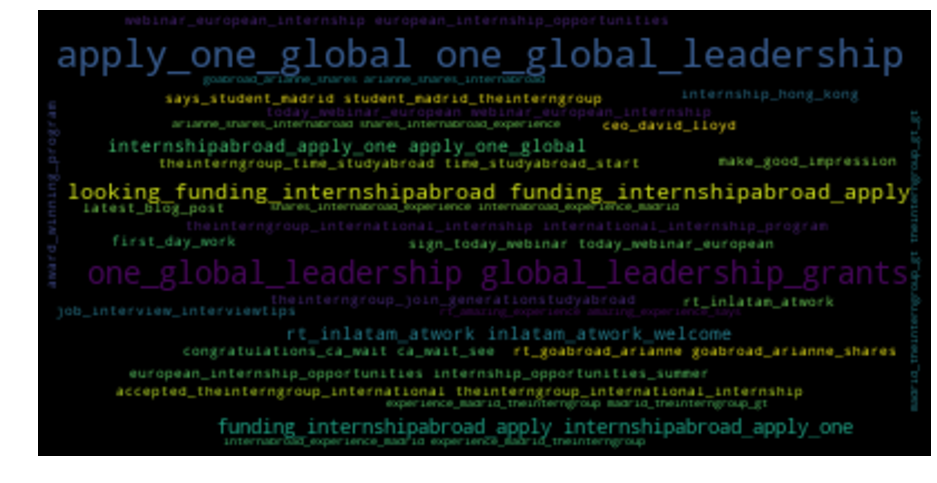

In [77]:
ngram_wordcloud(corpus=clean_data(datasets['theinterngroup']), n=3)

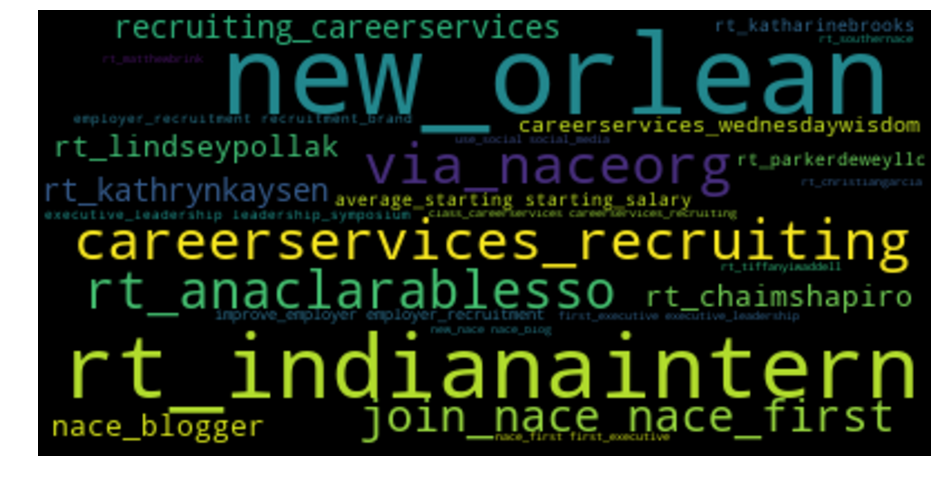

In [78]:
ngram_wordcloud(corpus=clean_data(datasets['@naceorg']), n=2)

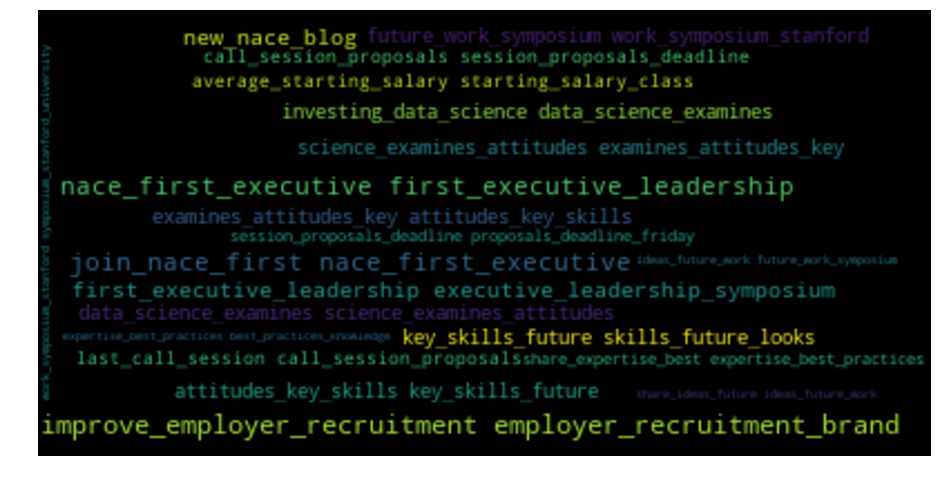

In [80]:
ngram_wordcloud(corpus=clean_data(datasets['@naceorg']), n=3)

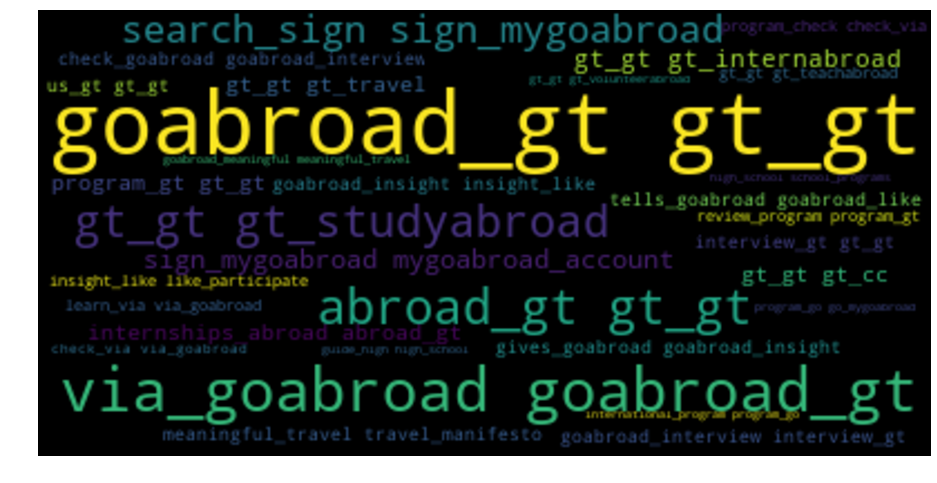

In [81]:
ngram_wordcloud(corpus=clean_data(datasets['GoAbroad']), n=2)

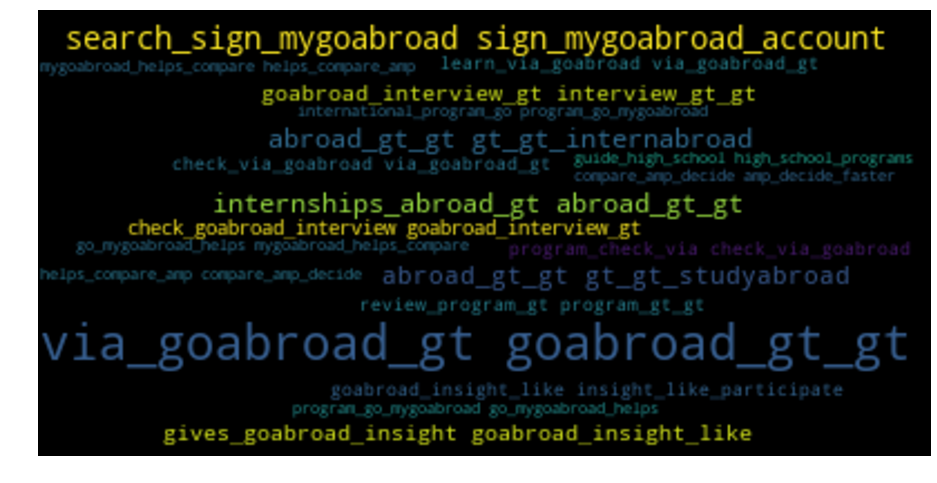

In [82]:
ngram_wordcloud(corpus=clean_data(datasets['GoAbroad']), n=3)

## Seasonality analysis

In [56]:
# dates = [[(tweet['created_at'], company) for tweet in datasets[company]] for company in datasets]

In [57]:
dates = []
for company in datasets:
    for tweet in datasets[company]:
        dates.append((tweet['created_at'], company))

In [61]:
df = pd.DataFrame(dates, columns=['created_at', 'company'])

In [62]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [63]:
df.set_index('created_at', inplace=True)

In [65]:
df['company'] = df['company'].astype('category')

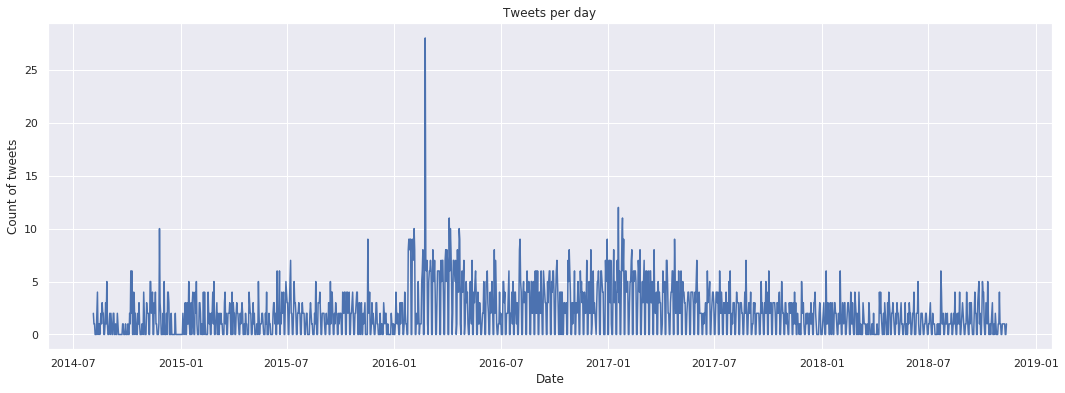

In [84]:
day_count = df[df['company'] == 'theinterngroup'].resample('D').count()['company']
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(day_count)
_ = plt.title("Tweets per day")
_ = plt.xlabel('Date')
_ = plt.ylabel('Count of tweets')

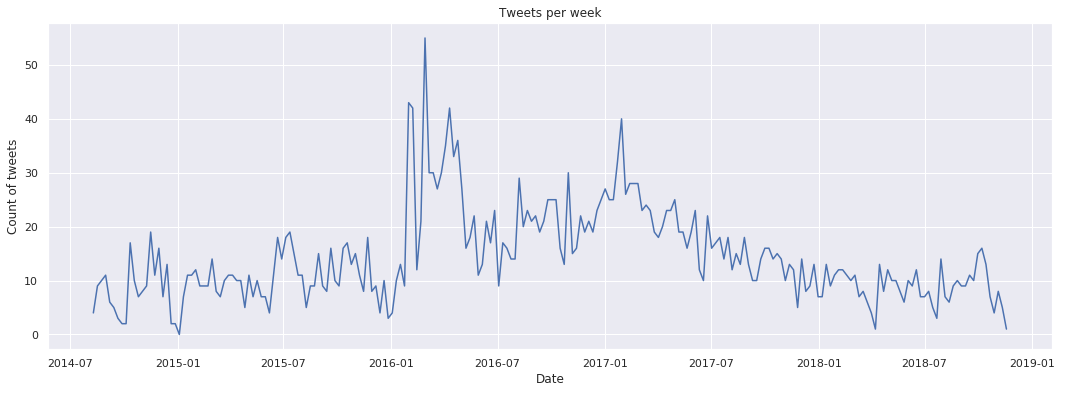

In [85]:
week_count = df[df['company'] == 'theinterngroup'].resample('W').count()['company']
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(week_count)
_ = plt.title("Tweets per week")
_ = plt.xlabel('Date')
_ = plt.ylabel('Count of tweets')
# _ = plt.xticks(week_count.index, week_count.index.strftime("%d-%m-%Y"), rotation=70)

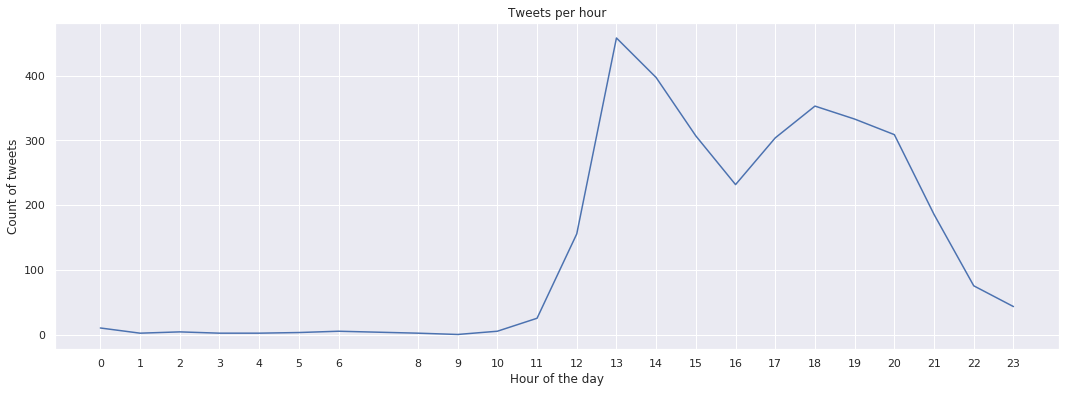

In [88]:
dataset = df[df['company'] == 'theinterngroup']
hour_count = dataset.groupby(dataset.index.hour).count()['company']
_ = plt.figure(figsize=(18, 6))
_ = plt.plot(hour_count)
_ = plt.title("Tweets per hour")
_ = plt.xlabel('Hour of the day')
_ = plt.ylabel('Count of tweets')
_ = plt.xticks(hour_count.index, hour_count.index)